<a href="https://colab.research.google.com/github/arjnmj/ML-Fraud-Detection/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
 import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df["Time"] = (df["Time"] % 86400) // 3600
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,23.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,23.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,23.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
# prompt: check skewness of features

from scipy.stats import skew

# Calculate skewness for each feature
skewness = X.skew()

# Print or analyze the skewness values
print(skewness)


Time      -0.490470
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
dtype: float64


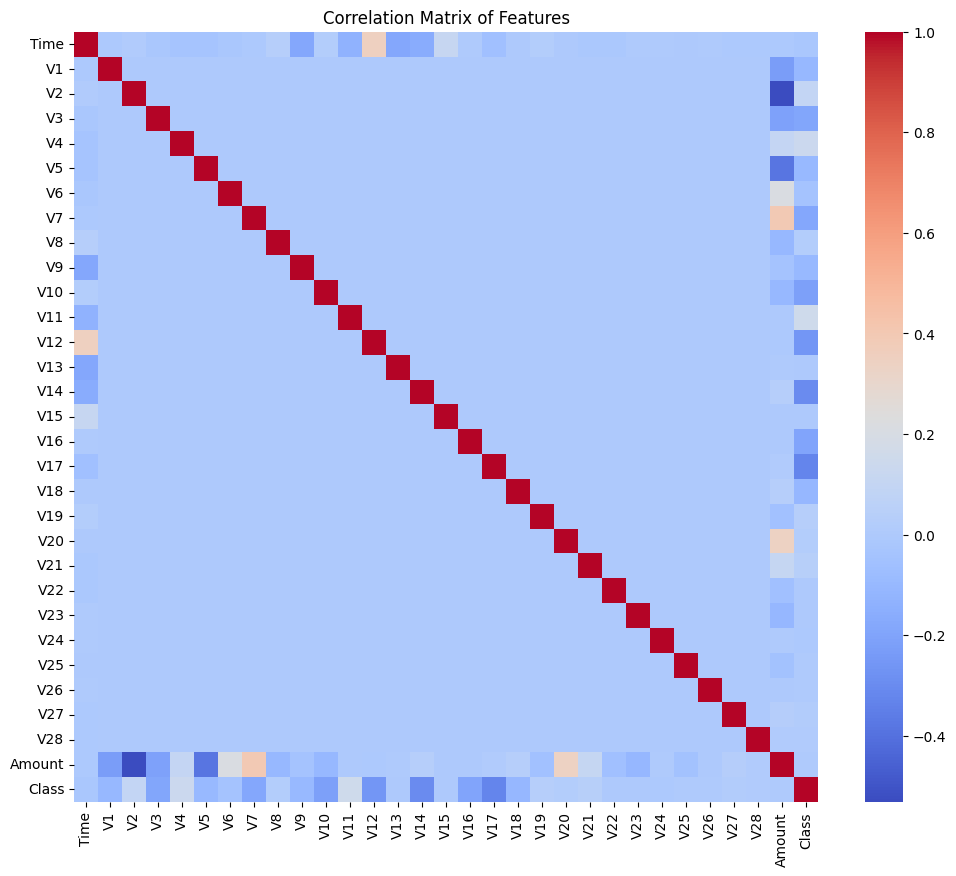

In [7]:
# prompt: correlation matrix plot

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,18.0,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,...,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,7.13
214082,14.0,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,...,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,150.00
106005,19.0,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,...,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,1302.49
58619,13.0,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,...,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,4.49
191638,11.0,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,...,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.0,-0.415022,0.713439,1.221551,-2.108216,0.187067,-1.281616,1.118548,-0.345326,0.463473,...,0.075377,0.132886,0.756938,-0.290888,0.558730,0.037363,-0.871689,0.239482,-0.020422,1.00
233802,17.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99
85418,16.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99
29062,9.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42


In [9]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [10]:
import numpy as np
def encode_cyclical(df):
    df["Time_sin"] = np.sin(2 * np.pi * df["Time"] / 24)
    df["Time_cos"] = np.cos(2 * np.pi * df["Time"] / 24)
    return df.drop("Time", axis=1)

# Apply to train and test separately
X_train = encode_cyclical(X_train)
X_test = encode_cyclical(X_test)

In [11]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_sin,Time_cos
249927,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,-0.222719,...,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,7.13,-1.000000,-1.836970e-16
214082,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,0.517022,...,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,150.00,-0.500000,-8.660254e-01
106005,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,0.086419,...,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,1302.49,-0.965926,2.588190e-01
58619,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,0.128383,...,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,4.49,-0.258819,-9.659258e-01
191638,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,-0.283699,...,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,4.49,0.258819,-9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,-0.415022,0.713439,1.221551,-2.108216,0.187067,-1.281616,1.118548,-0.345326,0.463473,-0.999876,...,0.756938,-0.290888,0.558730,0.037363,-0.871689,0.239482,-0.020422,1.00,0.000000,1.000000e+00
233802,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,...,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99,-0.965926,-2.588190e-01
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99,-0.866025,-5.000000e-01
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42,0.707107,-7.071068e-01


In [12]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_sin,Time_cos
186882,-2.537331,1.890864,-0.840555,-1.102759,-2.105725,0.367811,-2.737844,-3.543314,-0.483147,0.112724,...,-2.167329,1.022567,-0.241143,-1.094885,-0.475427,-0.177157,-0.082691,37.40,0.258819,-9.659258e-01
165754,-0.250839,1.104108,0.206089,0.417324,1.204079,-0.350694,1.369769,-0.133535,-0.957100,-0.261170,...,0.499501,-0.392572,-0.393364,0.233354,-0.490717,0.143897,0.136810,9.27,0.866025,-5.000000e-01
235285,0.568980,-2.520416,-1.114138,1.670652,-1.128945,0.398822,0.190403,0.161493,0.840595,0.099172,...,-0.760732,-0.181332,0.595866,-0.760920,-1.048927,-0.096970,0.088686,700.00,-0.965926,-2.588190e-01
101271,1.328892,0.226908,-0.308968,0.381772,0.238490,-0.282946,0.029460,-0.079962,0.227173,-0.267319,...,-1.148959,-0.047403,-1.074464,0.375683,0.182045,-0.031732,0.017501,14.99,-1.000000,-1.836970e-16
5832,1.124863,-0.165691,1.337053,1.030033,-0.891116,0.202926,-0.825094,0.163280,2.301808,-0.641129,...,-0.195607,0.072785,0.045625,0.135192,0.308617,0.001142,0.017673,17.25,0.258819,9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64725,-1.808185,1.328808,-0.991449,-2.473986,2.185095,3.496806,-1.030373,-1.860286,0.182992,-0.099751,...,-0.020080,0.256883,1.014602,-0.108679,0.672870,-0.701644,-0.338981,0.92,-0.500000,-8.660254e-01
16688,-0.442905,0.716727,1.256775,0.860048,1.210872,1.066390,0.888914,-0.176599,-0.172991,0.594082,...,0.271637,-0.262547,-1.125678,0.019374,-0.233577,-0.013664,-0.274549,13.74,0.965926,-2.588190e-01
183868,2.092418,-0.931315,-1.553089,-1.131369,-0.197801,-0.373117,-0.390388,-0.119017,-0.702381,0.946786,...,-0.274004,0.214650,0.257477,-0.193262,-0.458271,-0.056360,-0.053928,74.00,0.500000,-8.660254e-01
45011,1.293234,0.097565,-0.209304,0.329036,0.034958,-0.145507,-0.203271,0.153076,0.217831,-0.041285,...,-1.128741,0.000733,-0.956668,0.259784,0.158010,-0.044116,0.003539,1.98,0.258819,-9.659258e-01


In [13]:
from scipy.stats import skew

skewed_features = X_train.columns[abs(skew(X_train)) > 1]
print("Skewed Features:", skewed_features.tolist())

Skewed Features: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V28', 'Amount']


In [14]:
from sklearn.preprocessing import PowerTransformer

# Initialize and fit on training data
pt = PowerTransformer(method="yeo-johnson")
pt.fit(X_train[skewed_features])

# Transform train and test
X_train[skewed_features] = pt.transform(X_train[skewed_features])
X_test[skewed_features] = pt.transform(X_test[skewed_features])

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train (with class weights for imbalance)
model = LogisticRegression(
    class_weight={0:1, 1:9},  # Inverse of 578:1 imbalance
    solver="liblinear",
    penalty="l2",
    C=0.01
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.80      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



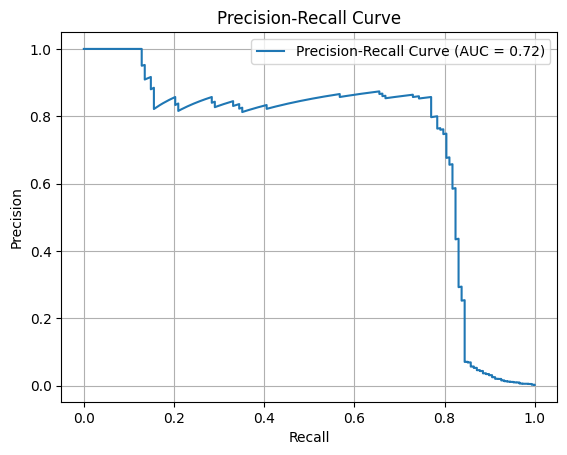

In [69]:
# prompt: precision recall curve for model

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate AUC
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, fbeta_score

# Calculate metrics
metrics = [['Accuracy', accuracy_score(y_test, y_pred)],
           ['Precision', precision_score(y_test, y_pred)],
           ['Recall', recall_score(y_test, y_pred)],
           ['F1_score', f1_score(y_test, y_pred)],
           ['F2_score', fbeta_score(y_test, y_pred, beta=2)]]  # Adding F2 score with beta=2 [[7]]

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics, columns=['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.999181
1,Precision,0.743750
2,Recall,0.804054
3,F1_score,0.772727
4,F2_score,0.791223


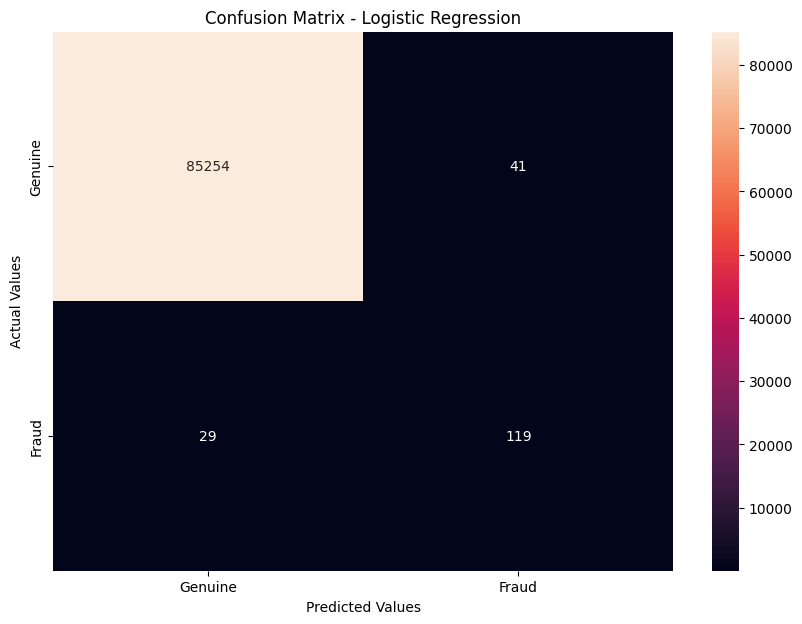

In [71]:
# prompt: confusion matrxi plot

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()
